In [ ]:
import numpy as np
import pandas as pd
import  seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
from xgboost import XGBClassifier

In [ ]:
train_df = pd.read_csv("Train_Data.csv")

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1966 entries, 0 to 1965
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       1954 non-null   float64
 1   RIAGENDR   1948 non-null   float64
 2   PAQ605     1953 non-null   float64
 3   BMXBMI     1948 non-null   float64
 4   LBXGLU     1953 non-null   float64
 5   DIQ010     1948 non-null   float64
 6   LBXGLT     1955 non-null   float64
 7   LBXIN      1957 non-null   float64
 8   age_group  1952 non-null   object 
dtypes: float64(8), object(1)
memory usage: 138.4+ KB


In [ ]:
train_df.shape

(1966, 9)

In [ ]:
class_counts = train_df['age_group'].value_counts()
print(class_counts)

age_group
Adult     1638
Senior     314
Name: count, dtype: int64


In [ ]:
count = 0
for item in class_counts:
    count += item
print("Total Adult + Senior found in dataset : ", count)

Total Adult + Senior found in dataset :  1952


In [ ]:
print("\nThe count of NULL values in this Dataset are : \n", train_df.isnull().sum())


The count of NULL values in this Dataset are : 
 SEQN         12
RIAGENDR     18
PAQ605       13
BMXBMI       18
LBXGLU       13
DIQ010       18
LBXGLT       11
LBXIN         9
age_group    14
dtype: int64




---



## **The dataset contains the following features:**

**SEQN**: *Sequence number (identifier)*

**RIAGENDR**: *Respondent's Gender (1=Male, 2=Female)*

**PAQ605**: *Physical activity questionnaire response: If the respondent engages in moderate or vigorous-intensity sports, fitness, or recreational activities in the typical week*

**BMXBMI**: *Body Mass Index*

**LBXGLU**: *Glucose level*

**DIQ010**: *Diabetes questionnaire response*

**LBXGLT**: *Glucose tolerance (Oral)*

**LBXIN**: *Insulin level*

In [ ]:
train_df.rename(columns = {'SEQN':'seq_no', 'RIAGENDR':'gender', 'PAQ605':'physical_activity', 'BMXBMI':'BMI', 'LBXGLU':'glucose',
                           'DIQ010':'diabetes', 'LBXGLT':'glucose_tolerance', 'LBXIN':'insulin_level'}, inplace=True)

In [ ]:
train_df.head()

,seq_no,gender,physical_activity,BMI,glucose,diabetes,glucose_tolerance,insulin_level,age_group
0,73564.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,Adult
1,73568.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85,Adult
2,73576.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14,Adult
3,73577.0,1.0,2.0,28.9,104.0,NaN,84.0,16.15,Adult
4,73580.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92,Adult


In [ ]:
print("Number of elements not ending with .0")
print("\nCount\t\tColumn Name")
print("--------------------------------------")
for col in train_df.select_dtypes(include='float64'):
    count = (train_df[col] % 1 != 0).sum()
    print(f"{count}\t\t'{col}'")

Number of elements not ending with .0

Count		Column Name
--------------------------------------
12		'seq_no'
18		'gender'
13		'physical_activity'
1798		'BMI'
13		'glucose'
18		'diabetes'
11		'glucose_tolerance'
1943		'insulin_level'


In [ ]:
train_df[train_df['gender'] % 1 != 0]

,seq_no,gender,physical_activity,BMI,glucose,diabetes,glucose_tolerance,insulin_level,age_group
303,75190.0,NaN,2.0,28.4,99.0,2.0,98.0,8.99,Adult
471,NaN,NaN,2.0,27.1,89.0,2.0,90.0,10.73,Adult
584,76626.0,NaN,2.0,27.4,119.0,2.0,159.0,9.03,Adult
600,76725.0,NaN,2.0,24.2,92.0,2.0,121.0,9.64,Adult
693,77193.0,NaN,2.0,17.1,94.0,2.0,101.0,8.30,Adult
887,78153.0,NaN,1.0,20.9,96.0,2.0,75.0,10.90,Adult
918,78379.0,NaN,2.0,48.3,96.0,2.0,108.0,7.95,Adult
923,78404.0,NaN,2.0,34.5,98.0,2.0,84.0,13.42,Adult
983,78718.0,NaN,2.0,26.3,95.0,2.0,120.0,6.67,Adult
1302,80388.0,NaN,2.0,21.7,101.0,2.0,89.0,9.29,Adult


In [ ]:
print("Number of elements not having NULL & not ending with .0")
print("\nCount\t\tColumn Name")
print("--------------------------------------")

convert_to_int = []
for col in train_df.select_dtypes(include='float64'):
    valid_values = train_df[col].dropna()
    count = (valid_values % 1 != 0).sum()
    print(f"{count}\t\t'{col}'")
    if count == 0:
        convert_to_int.append(train_df[col].name)

Number of elements not having NULL & not ending with .0

Count		Column Name
--------------------------------------
0		'seq_no'
0		'gender'
0		'physical_activity'
1780		'BMI'
0		'glucose'
0		'diabetes'
0		'glucose_tolerance'
1934		'insulin_level'


In [ ]:
convert_to_int

['seq_no',
 'gender',
 'physical_activity',
 'glucose',
 'diabetes',
 'glucose_tolerance']

In [ ]:
for col in train_df.select_dtypes(include='float64'):
    if col in convert_to_int:
        train_df[col] = train_df[col].astype('Int64')
        print(f"Converted '{col}' to Int64")

Converted 'seq_no' to Int64
Converted 'gender' to Int64
Converted 'physical_activity' to Int64
Converted 'glucose' to Int64
Converted 'diabetes' to Int64
Converted 'glucose_tolerance' to Int64


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1966 entries, 0 to 1965
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seq_no             1954 non-null   Int64  
 1   gender             1948 non-null   Int64  
 2   physical_activity  1953 non-null   Int64  
 3   BMI                1948 non-null   float64
 4   glucose            1953 non-null   Int64  
 5   diabetes           1948 non-null   Int64  
 6   glucose_tolerance  1955 non-null   Int64  
 7   insulin_level      1957 non-null   float64
 8   age_group          1952 non-null   object 
dtypes: Int64(6), float64(2), object(1)
memory usage: 149.9+ KB


In [ ]:
train_df.plot(
    kind='scatter',
    x='seq_no',
    y=['physical_activity', 'BMI', 'glucose', 'diabetes', 'glucose_tolerance', 'insulin_level'],
    backend='plotly',
    width=1100,
)

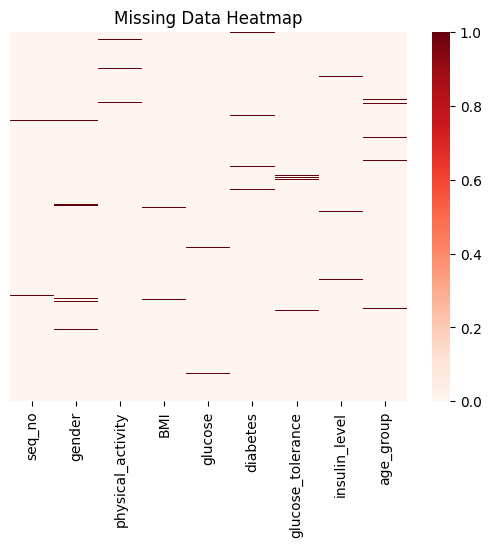

In [ ]:
sns.heatmap(train_df.isnull(), cbar=True, yticklabels=False, cmap="Reds")
plt.title("Missing Data Heatmap")
plt.show()

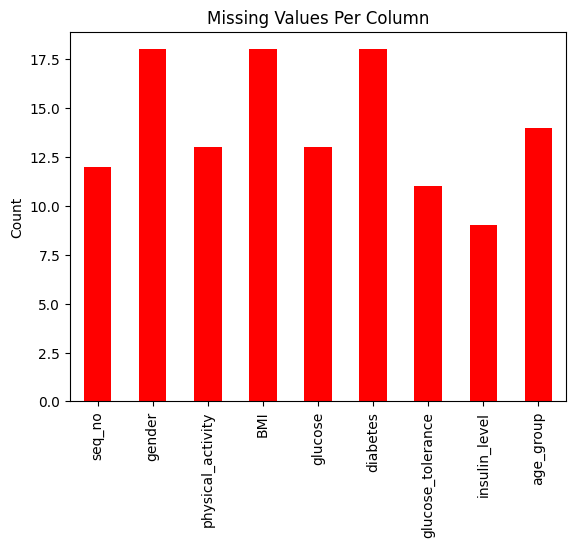

In [ ]:
train_df.isnull().sum().plot(kind='bar', color='red')
plt.title("Missing Values Per Column")
plt.ylabel("Count")
plt.show()

array([[<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'glucose'}>],
       [<Axes: title={'center': 'insulin_level'}>, <Axes: >]],
      dtype=object)

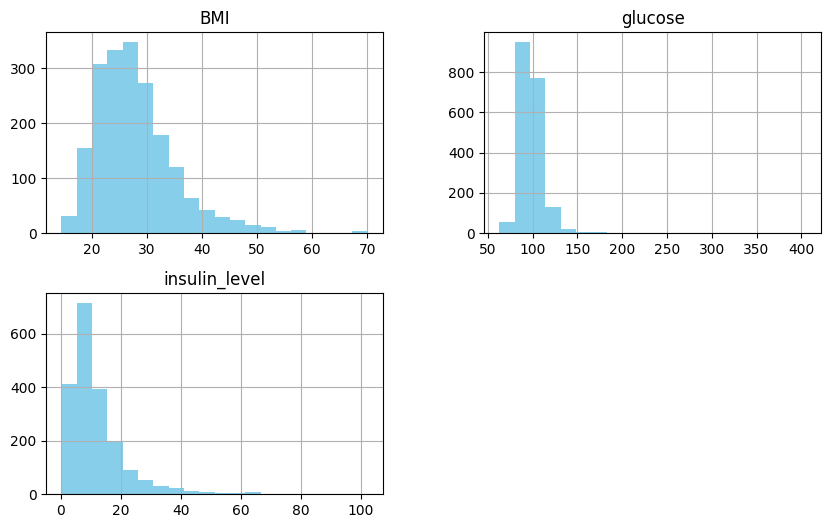

In [ ]:
train_df[['BMI', 'glucose', 'insulin_level']].hist(bins=20, figsize=(10,6), color='skyblue')

Text(0.5, 1.0, 'Glucose Levels by Gender')

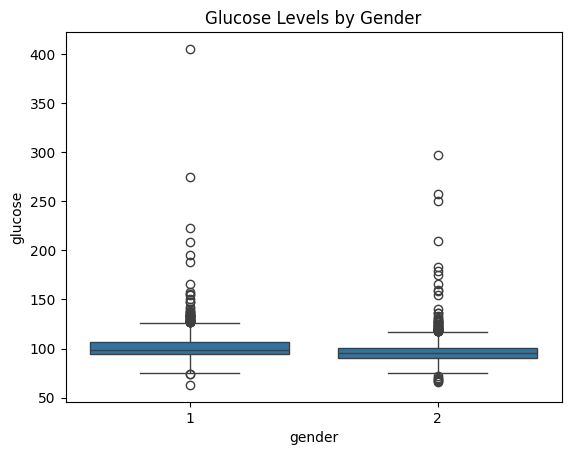

In [ ]:
sns.boxplot(x='gender', y='glucose', data=train_df)
plt.title("Glucose Levels by Gender")

Text(0.5, 1.0, 'Correlation Between Numeric Features')

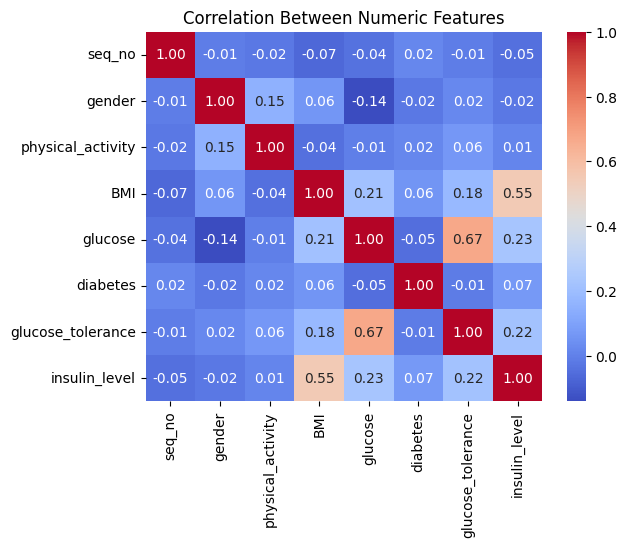

In [ ]:
corr = train_df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Numeric Features")

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning:

84.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning:

41.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



<Axes: xlabel='age_group', ylabel='BMI'>

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning:

85.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning:

44.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



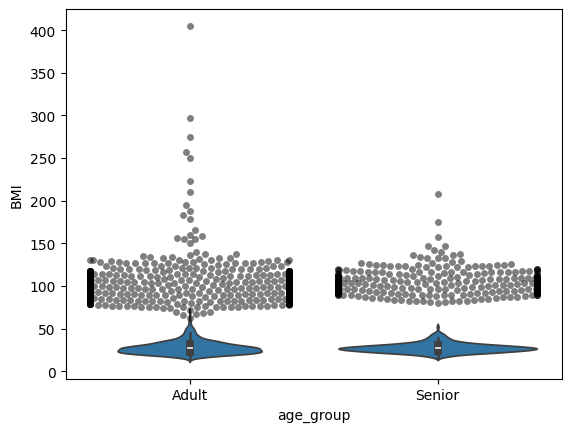

In [ ]:
sns.violinplot(x='age_group', y='BMI', data=train_df)
sns.swarmplot(x='age_group', y='glucose', data=train_df, color='k', alpha=0.5)

<Axes: xlabel='age_group', ylabel='count'>

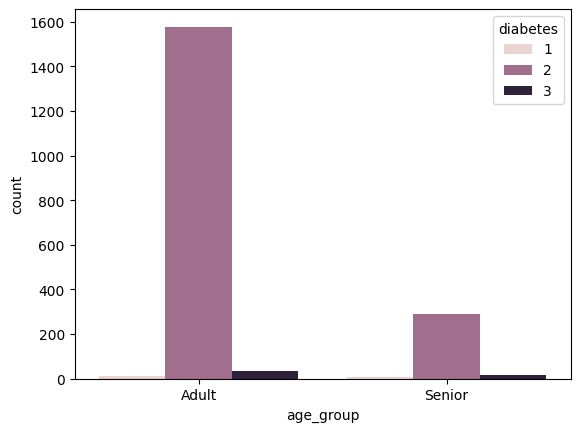

In [ ]:
sns.countplot(x='age_group', hue='diabetes', data=train_df)

In [ ]:
train_df.head()

,seq_no,gender,physical_activity,BMI,glucose,diabetes,glucose_tolerance,insulin_level,age_group
0,73564,2,2,35.7,110,2,150,14.91,Adult
1,73568,2,2,20.3,89,2,80,3.85,Adult
2,73576,1,2,23.2,89,2,68,6.14,Adult
3,73577,1,2,28.9,104,<NA>,84,16.15,Adult
4,73580,2,1,35.9,103,2,81,10.92,Adult


<Axes: xlabel='age_group', ylabel='count'>

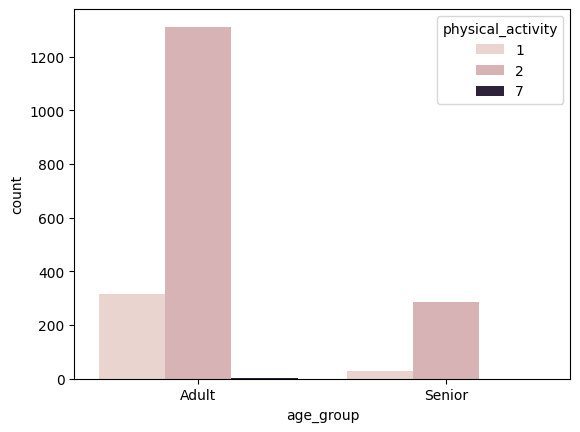

In [ ]:
sns.countplot(x='age_group', hue='physical_activity', data=train_df)

TypeError: Cannot interpret 'Int64Dtype()' as a data type

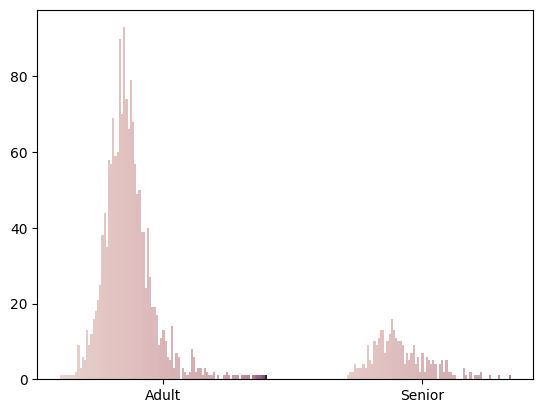

In [ ]:
sns.countplot(x='age_group', hue='glucose', data=train_df)

TypeError: Cannot interpret 'Int64Dtype()' as a data type

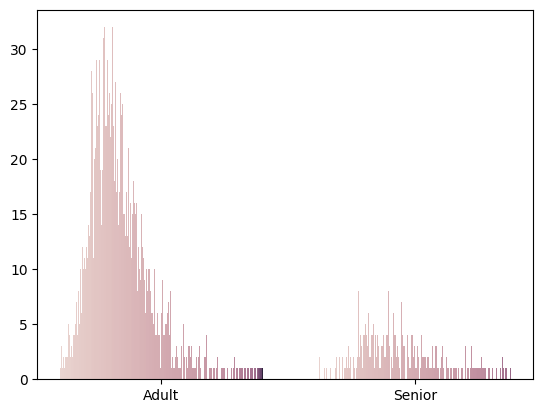

In [ ]:
sns.countplot(x='age_group', hue='glucose_tolerance', data=train_df)

<Axes: xlabel='age_group', ylabel='count'>

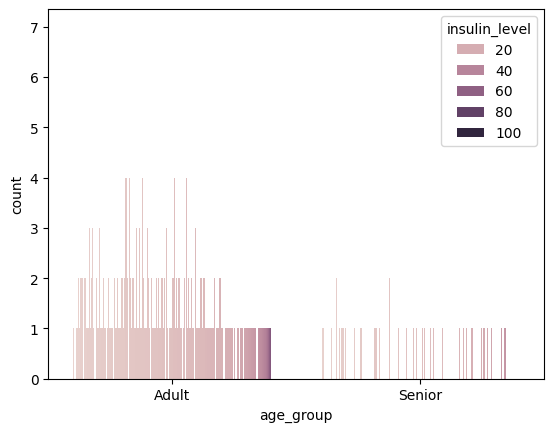

In [ ]:
sns.countplot(x='age_group', hue='insulin_level', data=train_df)

In [ ]:
print("\nThe count of NULL values in this Dataset are : \n", train_df.isnull().sum())


The count of NULL values in this Dataset are : 
 seq_no               12
gender               18
physical_activity    13
BMI                  18
glucose              13
diabetes             18
glucose_tolerance    11
insulin_level         9
age_group            14
dtype: int64


# **Data Preprocessing**

In [ ]:
train_df.isnull().sum()

,0
seq_no,12
gender,18
physical_activity,13
BMI,18
glucose,13
diabetes,18
glucose_tolerance,11
insulin_level,9
age_group,14


In [ ]:
train_df = train_df.dropna(subset=['age_group'])

In [ ]:
# Numeric columns with median
for col in ['BMI', 'insulin_level']:
    median_val = train_df[col].median()
    train_df.loc[:, col] = train_df[col].fillna(median_val)

# Categorical columns with mode
for col in ['gender', 'physical_activity', 'diabetes']:
    mode_val = train_df[col].mode()[0]
    train_df.loc[:, col] = train_df[col].fillna(mode_val)

for col in ['glucose', 'glucose_tolerance']:
    train_df.loc[:, col] = train_df[col].fillna(train_df[col].median())

In [ ]:
train_df.isnull().sum()

,0
seq_no,12
gender,0
physical_activity,0
BMI,0
glucose,0
diabetes,0
glucose_tolerance,0
insulin_level,0
age_group,0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1952 entries, 0 to 1965
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seq_no             1940 non-null   Int64  
 1   gender             1952 non-null   Int64  
 2   physical_activity  1952 non-null   Int64  
 3   BMI                1952 non-null   float64
 4   glucose            1952 non-null   Int64  
 5   diabetes           1952 non-null   Int64  
 6   glucose_tolerance  1952 non-null   Int64  
 7   insulin_level      1952 non-null   float64
 8   age_group          1952 non-null   object 
dtypes: Int64(6), float64(2), object(1)
memory usage: 163.9+ KB


In [ ]:
train_df.loc[:, 'age_group'] = train_df['age_group'].map({'Adult': 0, 'Senior': 1}).astype('Int64')

In [ ]:
print(train_df.isnull().sum())
print(train_df.dtypes)

seq_no               12
gender                0
physical_activity     0
BMI                   0
glucose               0
diabetes              0
glucose_tolerance     0
insulin_level         0
age_group             0
dtype: int64
seq_no                 Int64
gender                 Int64
physical_activity      Int64
BMI                  float64
glucose                Int64
diabetes               Int64
glucose_tolerance      Int64
insulin_level        float64
age_group             object
dtype: object


In [ ]:
train_df.drop(columns=['seq_no'], inplace=True)

/tmp/ipython-input-24-2792082541.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
X = train_df.drop('age_group', axis=1)
y = train_df['age_group']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [ ]:
print(y_train.unique())
print(y_train.dtype)

[0 1]
object


In [ ]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# **Implementing Decision Tree**

In [ ]:
tree = DecisionTreeClassifier(
    max_depth=90,
    min_samples_split=2,
    class_weight='balanced',
    random_state=42
)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=90, random_state=42)

In [ ]:
y_pred = tree.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['Adult', 'Senior']))

cm = confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

       Adult       0.85      0.82      0.83       328
      Senior       0.22      0.27      0.24        63

    accuracy                           0.73       391
   macro avg       0.54      0.54      0.54       391
weighted avg       0.75      0.73      0.74       391



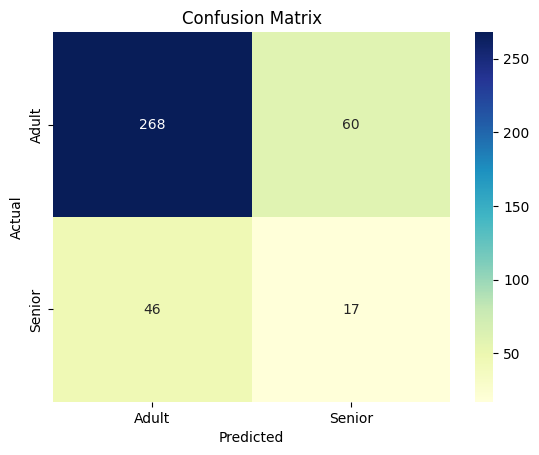

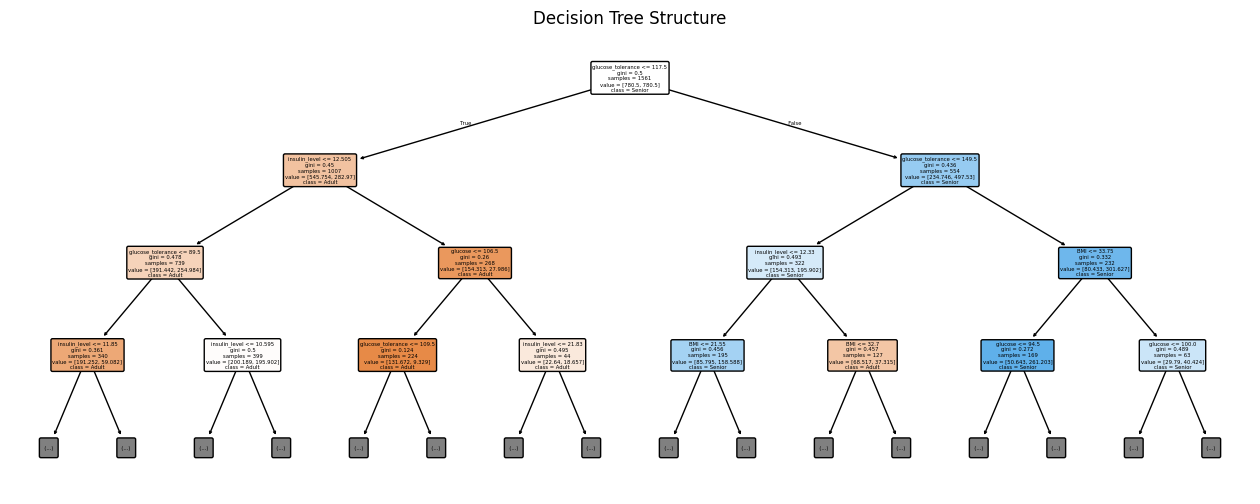

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Adult', 'Senior'], yticklabels=['Adult', 'Senior'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Decision Tree
plt.figure(figsize=(16, 6))
plot_tree(tree, feature_names=X.columns, class_names=['Adult', 'Senior'], filled=True, rounded=True, max_depth=3)
plt.title("Decision Tree Structure")
plt.show()



---



# **Implementing Random Forest**

## **Experiment 1**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_dist = {
    'n_estimators': randint(100, 600),
    'max_depth': [4, 6, 8, None],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced', random_state=42),
    param_distributions=param_dist,
    n_iter=50,
    cv=cv,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

random_search.fit(X_train, y_train)

print("Best Parameters (Random Search):", random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters (Random Search): {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 225}


In [ ]:
y_pred = random_search.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['Adult', 'Senior']))

cm = confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

       Adult       0.85      0.95      0.90       328
      Senior       0.37      0.16      0.22        63

    accuracy                           0.82       391
   macro avg       0.61      0.55      0.56       391
weighted avg       0.78      0.82      0.79       391



## **Experiment 2**

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {
    'n_estimators': [100, 300, 500],           # More trees = better generalization
    'max_depth': [4, 6, 8, None],              # Controls tree depth; None = full depth
    'min_samples_split': [2, 5, 10],           # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],             # Minimum samples per leaf
    'max_features': ['sqrt', 'log2', None],   # Number of features to consider at each split
    'bootstrap': [True, False]                # Whether to use bootstrapped samples
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid=param_grid,
    cv=cv,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best Parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [ ]:
y_pred = grid_search.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['Adult', 'Senior']))

cm = confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

       Adult       0.86      0.95      0.90       328
      Senior       0.41      0.17      0.24        63

    accuracy                           0.83       391
   macro avg       0.63      0.56      0.57       391
weighted avg       0.78      0.83      0.80       391



In [ ]:
test_df = pd.read_csv('Test_Data.csv')
test_df.rename(columns = {'SEQN':'seq_no', 'RIAGENDR':'gender', 'PAQ605':'physical_activity', 'BMXBMI':'BMI', 'LBXGLU':'glucose',
                           'DIQ010':'diabetes', 'LBXGLT':'glucose_tolerance', 'LBXIN':'insulin_level'}, inplace=True)
test_df.head()

,seq_no,gender,physical_activity,BMI,glucose,diabetes,glucose_tolerance,insulin_level
0,77017.0,1.0,1.0,32.2,96.0,2.0,135.0,15.11
1,75580.0,2.0,2.0,26.3,100.0,2.0,141.0,15.26
2,73820.0,1.0,2.0,28.6,107.0,2.0,136.0,8.82
3,80489.0,2.0,1.0,22.1,93.0,2.0,111.0,12.13
4,82047.0,1.0,1.0,24.7,91.0,2.0,105.0,3.12


In [ ]:
print("Number of elements not having NULL & not ending with .0")
print("\nCount\t\tColumn Name")
print("--------------------------------------")

convert_to_int = []
for col in test_df.select_dtypes(include='float64'):
    valid_values = test_df[col].dropna()
    count = (valid_values % 1 != 0).sum()
    print(f"{count}\t\t'{col}'")
    if count == 0:
        convert_to_int.append(test_df[col].name)

for col in test_df.select_dtypes(include='float64'):
    if col in convert_to_int:
        test_df[col] = test_df[col].astype('Int64')
        print(f"Converted '{col}' to Int64")

Number of elements not having NULL & not ending with .0

Count		Column Name
--------------------------------------
0		'seq_no'
0		'gender'
0		'physical_activity'
281		'BMI'
0		'glucose'
0		'diabetes'
0		'glucose_tolerance'
308		'insulin_level'
Converted 'seq_no' to Int64
Converted 'gender' to Int64
Converted 'physical_activity' to Int64
Converted 'glucose' to Int64
Converted 'diabetes' to Int64
Converted 'glucose_tolerance' to Int64


In [ ]:
test_df.drop(columns=['seq_no'], inplace=True)

In [ ]:
predictions = grid_search.predict(test_df)

output_df = pd.DataFrame({'age_group': predictions})

output_df.to_csv('submission.csv', index=False)

## **Experiment 3**
###The submission file generated after testing from the below model is submitted on aiplanet hackathon.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
forest.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
y_pred = forest.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['Adult', 'Senior']))

cm = confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

       Adult       0.85      0.97      0.91       328
      Senior       0.42      0.13      0.20        63

    accuracy                           0.83       391
   macro avg       0.64      0.55      0.55       391
weighted avg       0.78      0.83      0.79       391



In [ ]:
# Adult = 0, Senior = 1
y_train.value_counts()

,count
age_group,
0,1310
1,251


In [ ]:
test_df = pd.read_csv('Test_Data.csv')
test_df.rename(columns = {'SEQN':'seq_no', 'RIAGENDR':'gender', 'PAQ605':'physical_activity', 'BMXBMI':'BMI', 'LBXGLU':'glucose',
                           'DIQ010':'diabetes', 'LBXGLT':'glucose_tolerance', 'LBXIN':'insulin_level'}, inplace=True)
test_df.head()

,seq_no,gender,physical_activity,BMI,glucose,diabetes,glucose_tolerance,insulin_level
0,77017.0,1.0,1.0,32.2,96.0,2.0,135.0,15.11
1,75580.0,2.0,2.0,26.3,100.0,2.0,141.0,15.26
2,73820.0,1.0,2.0,28.6,107.0,2.0,136.0,8.82
3,80489.0,2.0,1.0,22.1,93.0,2.0,111.0,12.13
4,82047.0,1.0,1.0,24.7,91.0,2.0,105.0,3.12


In [ ]:
print("Number of elements not having NULL & not ending with .0")
print("\nCount\t\tColumn Name")
print("--------------------------------------")

convert_to_int = []
for col in test_df.select_dtypes(include='float64'):
    valid_values = test_df[col].dropna()
    count = (valid_values % 1 != 0).sum()
    print(f"{count}\t\t'{col}'")
    if count == 0:
        convert_to_int.append(test_df[col].name)

for col in test_df.select_dtypes(include='float64'):
    if col in convert_to_int:
        test_df[col] = test_df[col].astype('Int64')
        print(f"Converted '{col}' to Int64")

Number of elements not having NULL & not ending with .0

Count		Column Name
--------------------------------------
0		'seq_no'
0		'gender'
0		'physical_activity'
281		'BMI'
0		'glucose'
0		'diabetes'
0		'glucose_tolerance'
308		'insulin_level'
Converted 'seq_no' to Int64
Converted 'gender' to Int64
Converted 'physical_activity' to Int64
Converted 'glucose' to Int64
Converted 'diabetes' to Int64
Converted 'glucose_tolerance' to Int64


In [ ]:
test_df.drop(columns=['seq_no'], inplace=True)

In [ ]:
predictions = forest.predict(test_df)

output_df = pd.DataFrame({'age_group': predictions})

output_df.to_csv('submission.csv', index=False)

In [ ]:
output_df.head()

,age_group
0,0
1,0
2,0
3,0
4,0


# **Implementing XGBoost**

In [ ]:
X = train_df.drop('age_group', axis=1)
y = train_df['age_group'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

In [ ]:
xgb = XGBClassifier(
    n_estimators=350,
    max_depth=20,
    learning_rate=0.02,
    subsample=0.6,
    colsample_bytree=0.9,
    use_label_encoder=False,
    eval_metric='auc',
    random_state=42
)

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

print("Test Accuracy:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print(classification_report(y_test, y_pred, target_names=['Adult', 'Senior']))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[13:01:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




Test Accuracy: 83.63 %
              precision    recall  f1-score   support

       Adult       0.86      0.96      0.91       328
      Senior       0.48      0.17      0.26        63

    accuracy                           0.84       391
   macro avg       0.67      0.57      0.58       391
weighted avg       0.80      0.84      0.80       391



In [ ]:
y_pred = xgb.predict(X_test)

print("Test Accuracy:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print(classification_report(y_test, y_pred, target_names=['Adult', 'Senior']))

Test Accuracy: 84.4 %
              precision    recall  f1-score   support

       Adult       0.86      0.98      0.91       328
      Senior       0.56      0.16      0.25        63

    accuracy                           0.84       391
   macro avg       0.71      0.57      0.58       391
weighted avg       0.81      0.84      0.81       391



In [ ]:
test_df = pd.read_csv('Test_Data.csv')
test_df.rename(columns = {'SEQN':'seq_no', 'RIAGENDR':'gender', 'PAQ605':'physical_activity', 'BMXBMI':'BMI', 'LBXGLU':'glucose',
                           'DIQ010':'diabetes', 'LBXGLT':'glucose_tolerance', 'LBXIN':'insulin_level'}, inplace=True)
test_df.head()

,seq_no,gender,physical_activity,BMI,glucose,diabetes,glucose_tolerance,insulin_level
0,77017.0,1.0,1.0,32.2,96.0,2.0,135.0,15.11
1,75580.0,2.0,2.0,26.3,100.0,2.0,141.0,15.26
2,73820.0,1.0,2.0,28.6,107.0,2.0,136.0,8.82
3,80489.0,2.0,1.0,22.1,93.0,2.0,111.0,12.13
4,82047.0,1.0,1.0,24.7,91.0,2.0,105.0,3.12


In [ ]:
print("Number of elements not having NULL & not ending with .0")
print("\nCount\t\tColumn Name")
print("--------------------------------------")

convert_to_int = []
for col in test_df.select_dtypes(include='float64'):
    valid_values = test_df[col].dropna()
    count = (valid_values % 1 != 0).sum()
    print(f"{count}\t\t'{col}'")
    if count == 0:
        convert_to_int.append(test_df[col].name)

for col in test_df.select_dtypes(include='float64'):
    if col in convert_to_int:
        test_df[col] = test_df[col].astype('Int64')
        print(f"Converted '{col}' to Int64")

Number of elements not having NULL & not ending with .0

Count		Column Name
--------------------------------------
0		'seq_no'
0		'gender'
0		'physical_activity'
281		'BMI'
0		'glucose'
0		'diabetes'
0		'glucose_tolerance'
308		'insulin_level'
Converted 'seq_no' to Int64
Converted 'gender' to Int64
Converted 'physical_activity' to Int64
Converted 'glucose' to Int64
Converted 'diabetes' to Int64
Converted 'glucose_tolerance' to Int64


In [ ]:
test_df.drop(columns=['seq_no'], inplace=True)

In [ ]:
predictions = xgb.predict(test_df)

output_df = pd.DataFrame({'age_group': predictions})

output_df.to_csv('submission.csv', index=False)

# **Other Experiments**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

model_grid = {
    'LogisticRegression': {
        'model': LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42),
        'params': {'C': [0.01, 0.1, 1, 10]}
    },
    'SVM': {
        'model': SVC(class_weight='balanced', probability=True, random_state=42),
        'params': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(class_weight='balanced', random_state=42),
        'params': {'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10]}
    },
    'RandomForest': {
        'model': RandomForestClassifier(class_weight='balanced', random_state=42),
        'params': {'n_estimators': [100, 200], 'max_depth': [5, 8], 'min_samples_split': [2, 5]}
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        'params': {'n_estimators': [100, 150], 'max_depth': [3, 5], 'learning_rate': [0.1, 0.3]}
    }
}

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

cv_results = {}

for name, mp in model_grid.items():
    clf = GridSearchCV(mp['model'], mp['params'], scoring='f1_weighted',
                       cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                       n_jobs=-1, verbose=1)
    clf.fit(X_train, y_train)
    cv_results[name] = {
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        'model': clf.best_estimator_
    }

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[16:40:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




In [ ]:
from sklearn.metrics import classification_report

best_model = max(cv_results.items(), key=lambda x: x[1]['best_score'])[1]['model']
y_pred = best_model.predict(X_test)

y_probs = best_model.predict_proba(X_test)[:, 1]
y_pred_adj = (y_probs >= 0.35).astype(int)



print(f"\nBest Model: {best_model}")
#print(classification_report(y_test, y_pred, target_names=['Adult', 'Senior']))
print(classification_report(y_test, y_pred_adj, target_names=['Adult', 'Senior']))


Best Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)
              precision    recall  f1-score   support

       Adult       0.86      0.92      0.89       328
      Senior       0.36      0.24      0.29        63

    accuracy                           0.81       391
   macro avg 

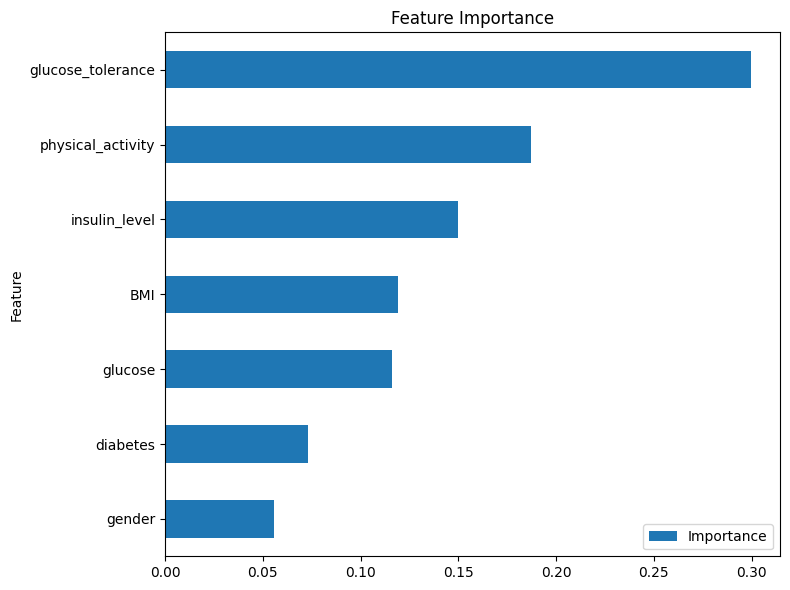

In [ ]:
importances = best_model.feature_importances_
feat_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feat_df.sort_values(by='Importance').plot(kind='barh', x='Feature', y='Importance', figsize=(8,6), title='Feature Importance')
plt.tight_layout()
plt.show()



---



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# --- STEP 1: Prepare your data ---
# Assuming 'train_df' is your cleaned DataFrame and 'age_group' is already encoded (0 = Adult, 1 = Senior)

X = train_df.drop('age_group', axis=1)
y = train_df['age_group'].astype(int)  # Ensure it's integer-typed

# --- STEP 2: Split the data ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# --- STEP 3: Standardize the features ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- STEP 4: Define and tune Logistic Regression ---
model = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)

param_grid = {'C': [0.01, 0.1, 1, 10]}
grid = GridSearchCV(model, param_grid, scoring='f1_weighted', cv=5, verbose=1, n_jobs=-1)
grid.fit(X_train_scaled, y_train)

# --- STEP 5: Evaluate the best model ---
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test_scaled)

y_probs = grid.best_estimator_.predict_proba(X_test_scaled)[:, 1]
y_pred_adj = (y_probs >= 0.35).astype(int)


print("Best Params:", grid.best_params_)
print(classification_report(y_test, y_pred_adj, target_names=['Adult', 'Senior']))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Params: {'C': 1}
              precision    recall  f1-score   support

       Adult       0.93      0.40      0.56       328
      Senior       0.21      0.84      0.34        63

    accuracy                           0.47       391
   macro avg       0.57      0.62      0.45       391
weighted avg       0.81      0.47      0.52       391



Test Set Accuracy: 58.57 %
              precision    recall  f1-score   support

       Adult       0.92      0.55      0.69       328
      Senior       0.24      0.75      0.37        63

    accuracy                           0.59       391
   macro avg       0.58      0.65      0.53       391
weighted avg       0.81      0.59      0.64       391



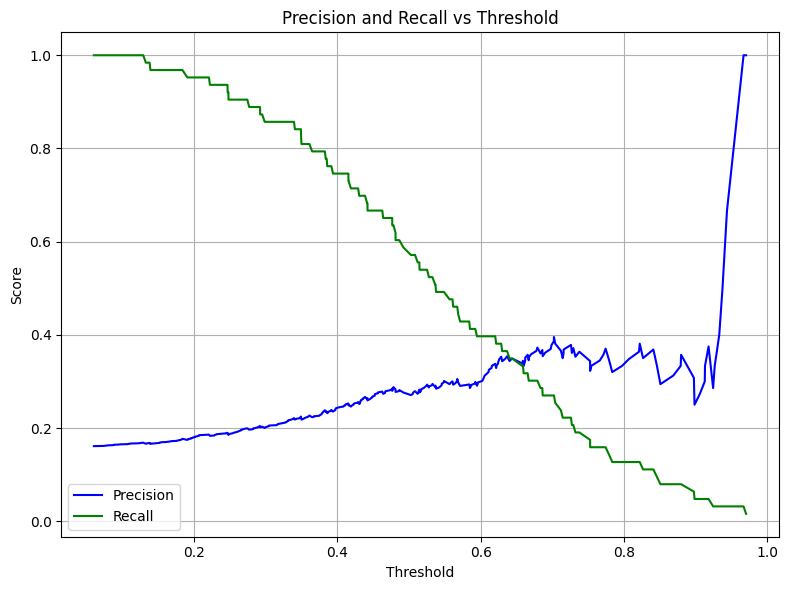

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_recall_curve
import matplotlib.pyplot as plt

# --- STEP 1: Prepare the data ---
X = train_df.drop('age_group', axis=1)
y = train_df['age_group'].astype(int)

# --- STEP 2: Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# --- STEP 3: Downsample majority class in training data ---
train_data = X_train.copy()
train_data['age_group'] = y_train

adult = train_data[train_data['age_group'] == 0]
senior = train_data[train_data['age_group'] == 1]

adult_downsampled = resample(adult, replace=False, n_samples=len(senior), random_state=42)

balanced_train = pd.concat([adult_downsampled, senior]).sample(frac=1, random_state=42)

X_train_bal = balanced_train.drop('age_group', axis=1)
y_train_bal = balanced_train['age_group']

# --- STEP 4: Train Random Forest ---
rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=8,
    class_weight='balanced',
    random_state=42
)
rf.fit(X_train_bal, y_train_bal)

# --- STEP 5: Predict probabilities and apply threshold ---
y_probs = rf.predict_proba(X_test)[:, 1]  # Probability of class 'Senior' (1)

# Set custom threshold
threshold = 0.4
y_pred_thresh = (y_probs >= threshold).astype(int)

# --- STEP 6: Evaluate performance ---
print("Test Set Accuracy:", round(accuracy_score(y_test, y_pred_thresh) * 100, 2), "%")
print(classification_report(y_test, y_pred_thresh, target_names=['Adult', 'Senior']))

# --- STEP 7: Plot Precision and Recall vs Threshold ---
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], label='Precision', color='blue')
plt.plot(thresholds, recalls[:-1], label='Recall', color='green')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()